## libs

In [1]:
# python utils
import itertools
import inspect

# pre-processing and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Model

## Import Data

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, _), (X_test, _) = fashion_mnist.load_data()

In [3]:
np.shape(X_train[0])

(28, 28)

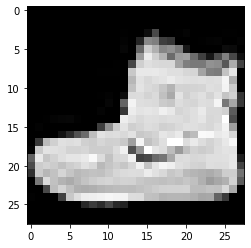

In [4]:
plt.imshow(X_train[0], cmap='gray')

## Preprocessing Data

In [5]:
# normalizing values of input df between 0 and 1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
# reshape 2D images into 1D feature array
X_train = np.array([x.flatten() for x in X_train])
X_test = np.array([x.flatten() for x in X_test])

In [7]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


## Model Builder

In [8]:
def auto_encoder_network_builder(
    input_layer, hidden_layers, output_layer, learning_rate
):
    model = Sequential()

    # first hidden layer
    model.add(
        Dense(
            hidden_layers[0],
            input_dim=input_layer,
            activation="relu",
        )
    )

    # following hidden layers
    for hidden_layer in hidden_layers[1:]:
        model.add(
            Dense(
                hidden_layer,
                activation="relu",
            )
        )

    # output layer
    model.add(Dense(output_layer, activation="sigmoid"))

    # create model
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizers.Adam(learning_rate=learning_rate),
    )

    return model


def build_models(builder_method, *args_tests):
    """
    Build models with all the combinations of the args_test passed
    """
    builder_args_names = list(inspect.signature(builder_method).parameters.keys())
    return [
        dict((("model", builder_method(*args)),) + tuple(zip(builder_args_names, args)))
        for args in itertools.product(*args_tests)
    ]

## Models Definition

In [9]:
# Parameters definition

# flattened img
input_layer_tests = [784]

# in the form of: encoging_layer1, ..., encoging_layerN, encoded_layer, decoding_layer1, ..., decoding_layerN 
hidden_layers_tests = [[32, 16, 32], [64, 32, 16, 32, 64], [128, 64, 32, 64, 128]]

# same as input
output_layer_tests = [784]

learning_rate_tests = [0.1, 0.01, 0.001]

In [10]:
# building models with all the combinations of the test parameters
models = build_models(
    auto_encoder_network_builder,
    input_layer_tests,
    hidden_layers_tests,
    output_layer_tests,
    learning_rate_tests,
)
models

[{'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f62b7620250>,
  'input_layer': 784,
  'hidden_layers': [32, 16, 32],
  'output_layer': 784,
  'learning_rate': 0.1},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f62bcfcde50>,
  'input_layer': 784,
  'hidden_layers': [32, 16, 32],
  'output_layer': 784,
  'learning_rate': 0.01},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f62bb6a81d0>,
  'input_layer': 784,
  'hidden_layers': [32, 16, 32],
  'output_layer': 784,
  'learning_rate': 0.001},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f62bb60be10>,
  'input_layer': 784,
  'hidden_layers': [64, 32, 16, 32, 64],
  'output_layer': 784,
  'learning_rate': 0.1},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f62bb4f54d0>,
  'input_layer': 784,
  'hidden_layers': [64, 32, 16, 32, 64],
  'output_layer': 784,
  'learning_rate': 0.01},
 {'model': <tensorflow.python.keras.engi

## Models Training

In [11]:
from random import sample, shuffle

trained_models = sample(models, len(models))

for model in trained_models:
    model["results"] = model["model"].fit(
        X_train, X_train, epochs=100, batch_size=256, shuffle=True
    )
    model["train_loss"] = model["model"].evaluate(X_train, X_train, verbose=0)
    model["test_loss"] = model["model"].evaluate(X_test, X_test, verbose=0)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3784
Epoch 2/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3111
Epoch 3/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3030
Epoch 4/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2985
Epoch 5/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2955
Epoch 6/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2933
Epoch 7/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2911
Epoch 8/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2891
Epoch 9/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2875
Epoch 10/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2863
Epoch 11/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2

60000/60000 [==============================] - 2s 30us/sample - loss: 0.2714
Epoch 92/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2713
Epoch 93/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2713
Epoch 94/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2712
Epoch 95/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2712
Epoch 96/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2712
Epoch 97/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2711
Epoch 98/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2711
Epoch 99/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2711
Epoch 100/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2711
Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4791


60000/60000 [==============================] - 2s 37us/sample - loss: 0.4906
Epoch 83/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4906
Epoch 84/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 85/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4906
Epoch 86/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4906
Epoch 87/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 88/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4906
Epoch 89/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4906
Epoch 90/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4906
Epoch 91/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4906
Epoch 92/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4906
Epoch 93/100
60000/6000

60000/60000 [==============================] - 1s 23us/sample - loss: 0.2852
Epoch 74/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2855
Epoch 75/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2853
Epoch 76/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2852
Epoch 77/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2853
Epoch 78/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2852
Epoch 79/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2852
Epoch 80/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2852
Epoch 81/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2850
Epoch 82/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2853
Epoch 83/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2849
Epoch 84/100
60000/6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 65/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 66/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 67/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 68/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 69/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4905
Epoch 70/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 71/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 72/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 73/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4906
Epoch 74/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4906
Epoch 75/100
60000/6000

60000/60000 [==============================] - 2s 28us/sample - loss: 0.2846
Epoch 56/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2845
Epoch 57/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2845
Epoch 58/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2843
Epoch 59/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2843
Epoch 60/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2842
Epoch 61/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2841
Epoch 62/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2841
Epoch 63/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2840
Epoch 64/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2839
Epoch 65/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2839
Epoch 66/100
60000/6000

60000/60000 [==============================] - 1s 22us/sample - loss: 0.3991
Epoch 47/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4004
Epoch 48/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3988
Epoch 49/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3994
Epoch 50/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3993
Epoch 51/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3992
Epoch 52/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3988
Epoch 53/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3994
Epoch 54/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3998
Epoch 55/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3993
Epoch 56/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3992
Epoch 57/100
60000/6000

60000/60000 [==============================] - 1s 22us/sample - loss: 0.2886
Epoch 38/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2884
Epoch 39/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2883
Epoch 40/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2882
Epoch 41/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2881
Epoch 42/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2880
Epoch 43/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2880
Epoch 44/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2879
Epoch 45/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2878
Epoch 46/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2877
Epoch 47/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2876
Epoch 48/100
60000/6000

60000/60000 [==============================] - 1s 20us/sample - loss: 0.2923
Epoch 29/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2923
Epoch 30/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2922
Epoch 31/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2922
Epoch 32/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2923
Epoch 33/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2919
Epoch 34/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2921
Epoch 35/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2920
Epoch 36/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2919
Epoch 37/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2919
Epoch 38/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2919
Epoch 39/100
60000/6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.2814
Epoch 20/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2813
Epoch 21/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2811
Epoch 22/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2809
Epoch 23/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2809
Epoch 24/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2807
Epoch 25/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2806
Epoch 26/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2806
Epoch 27/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2804
Epoch 28/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2805
Epoch 29/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2805
Epoch 30/100
60000/6000

# Results

### Top Models

In [12]:
# Sorting by test dataset accuracy, from higher to lower
models_ranking = sorted(trained_models, key=lambda d: d['test_loss'], reverse=False)
for i, model in enumerate(models_ranking):
    print("TOP {}:".format(i + 1))
    print("    test loss: {}".format(model["test_loss"]))
    print("    train loss: {}".format(model["train_loss"]))
    print("    hidden_layers: {}".format(model["hidden_layers"]))
    print("    learning_rate: {}".format(model["learning_rate"]))
    print()

TOP 1:
    test loss: 0.2737044812202454
    train loss: 0.2709554441213608
    hidden_layers: [128, 64, 32, 64, 128]
    learning_rate: 0.001

TOP 2:
    test loss: 0.2808180738925934
    train loss: 0.2779906405846278
    hidden_layers: [128, 64, 32, 64, 128]
    learning_rate: 0.01

TOP 3:
    test loss: 0.28484677238464357
    train loss: 0.2822219150702159
    hidden_layers: [64, 32, 16, 32, 64]
    learning_rate: 0.001

TOP 4:
    test loss: 0.28832625694274905
    train loss: 0.28573023285865784
    hidden_layers: [64, 32, 16, 32, 64]
    learning_rate: 0.01

TOP 5:
    test loss: 0.2883330237865448
    train loss: 0.2858293896436691
    hidden_layers: [32, 16, 32]
    learning_rate: 0.001

TOP 6:
    test loss: 0.2933420310497284
    train loss: 0.29086067997614545
    hidden_layers: [32, 16, 32]
    learning_rate: 0.01

TOP 7:
    test loss: 0.4041313414096832
    train loss: 0.40079944106737775
    hidden_layers: [32, 16, 32]
    learning_rate: 0.1

TOP 8:
    test loss: 0.49

## Get best model to plot other analysis

In [13]:
best_model = models_ranking[0]
best_model

{'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f62bb0dea50>,
 'input_layer': 784,
 'hidden_layers': [128, 64, 32, 64, 128],
 'output_layer': 784,
 'learning_rate': 0.001,
 'results': <tensorflow.python.keras.callbacks.History at 0x7f62baeb1750>,
 'train_loss': 0.2709554441213608,
 'test_loss': 0.2737044812202454}

## Train Loss over epochs

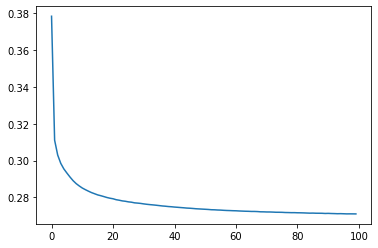

In [14]:
plt.plot(best_model["results"].history["loss"])

## Examples of Decoded images (test set)
- Original images in the first line and decoded images in the second line

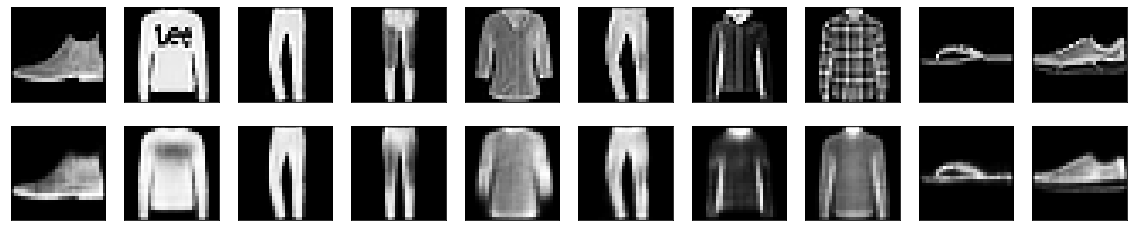

In [15]:
decoded_images = best_model["model"].predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Visualize first hidden layer ouput

In [16]:
def get_intermediate_layer_model(model, layer_index):
    return Model(inputs=model.input, outputs=model.layers[layer_index].output)

In [17]:
first_hidden_layer_model = get_intermediate_layer_model(best_model['model'], 0)

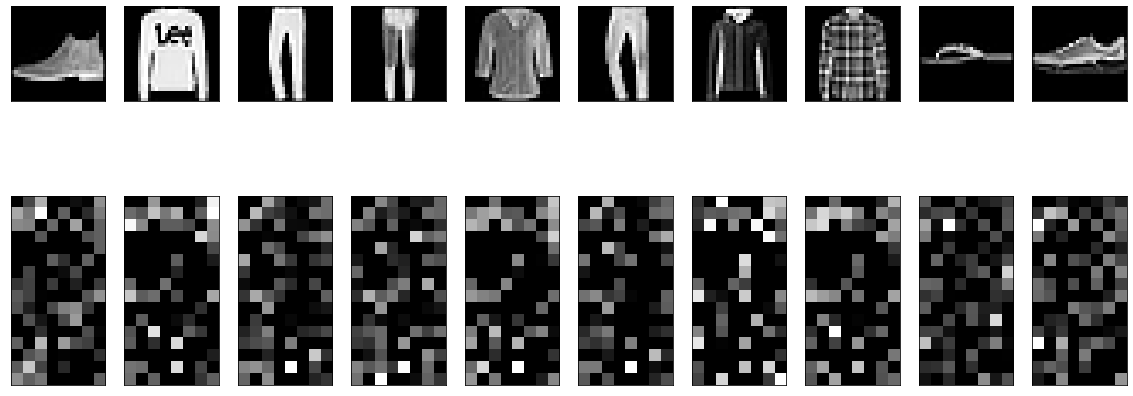

In [18]:
n = 10

encoded_images = first_hidden_layer_model.predict(X_test)

plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # encoded
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(16, 8)) # 128 outputs reshaped as retangle for visualization
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Original images in the first line and encoded by the first hidden layer in the second line